## Часть первая. Исследование одномерной выборки.
### Составить вариационный ряд

In [466]:
import math
import pandas as pd
data = pd.read_csv('sample_100.csv', sep=';')['Crime_rate']
d_max, d_min = data.max(), data.min()
k = 1 + 3.332 * math.log10(len(data))
h = math.ceil((d_max - d_min) / k)
print(f'Xmin = {d_min}; Xmax = {d_max}')
print(f'K = {k} = {math.floor(k)}; H = {h}')
data

Xmin = 0; Xmax = 990
K = 7.664 = 7; H = 130


0     137
1     255
2     223
3     117
4     297
     ... 
95     40
96    144
97    360
98     40
99    215
Name: Crime_rate, Length: 100, dtype: int64

In [467]:
series = {}
interval_starts = []
interval_ends = []
for i in range(math.floor(k) + 1):
    c_min = d_min + h * i
    c_max = c_min + h
    interval_starts.append(c_min)
    interval_ends.append(c_max)
    series[f'{c_min}-{c_max}'] = data[(data > c_min) & (data <= c_max)].tolist()
series[f'{d_min}-{d_min + h}'] = data[(data >= d_min) & (data <= d_min + h)].tolist()
series_n = pd.DataFrame({key: len(series[key]) for key in series}, index=['Count']).T
series_n['Centers'] = [(x[0] + x[1]) / 2 for x in zip(interval_starts, interval_ends)]
series_n['Relative'] = series_n['Count'] / 100
print('Вариационный ряд:')
print(series_n[['Count']].T)
series_n

Вариационный ряд:
       0-130  130-260  260-390  390-520  520-650  650-780  780-910  910-1040
Count     37       27       13       10        7        4        1         1


,Count,Centers,Relative
0-130,37,65.0,0.37
130-260,27,195.0,0.27
260-390,13,325.0,0.13
390-520,10,455.0,0.10
520-650,7,585.0,0.07
650-780,4,715.0,0.04
780-910,1,845.0,0.01
910-1040,1,975.0,0.01


### Полигон и гистограмма частот

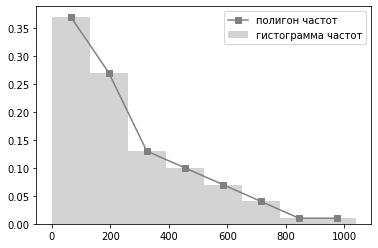

In [468]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(series_n['Centers'], series_n['Relative'], marker='s', label='полигон частот', color='gray')
plt.bar(np.array(interval_starts) + h / 2, series_n['Relative'], h, label='гистограмма частот', color='lightgray')
plt.legend()

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig('../images/fig01.png', dpi=500)

### Эмпирическая функция распределения

In [469]:
cumulative = [0.0]
for v in series_n['Relative']:
    cumulative.append(cumulative[-1] + v)
cumulative.append(1.0)
cumulative

[0.0, 0.37, 0.64, 0.77, 0.87, 0.94, 0.98, 0.99, 1.0, 1.0]

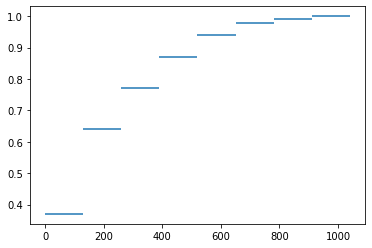

In [470]:
plt.hlines(cumulative[1:-1], interval_starts, interval_ends)

### Выборочная средняя

In [471]:
# несмещённая оценка генеральной средней
mean = (series_n['Count'] * series_n['Centers']).sum() / 100
mean

252.2

### Выборочная дисперсия

In [472]:
disp = (series_n['Count'] * (series_n['Centers'] - mean) ** 2).sum() / 100
disp

43710.16

### Исправленная дисперсия

In [473]:
s_2 = 100 * disp / 99
s_2

44151.67676767677

### Среднее квадратическое

In [474]:
sigma = math.sqrt(disp)
s = math.sqrt(s_2)
s, sigma

(210.12300389932744, 209.0697491269361)

### Ассиметрия

In [475]:
assim = (series_n['Count'] * (series_n['Centers'] - mean) ** 3).sum() / (100 * s ** 3)
assim

1.1653118003097043

### Эксцесс

In [476]:
ex = (series_n['Count'] * (series_n['Centers'] - mean) ** 4).sum() / (100 * s ** 4) - 3
ex

0.7386853698553475

### Доверительные интервалы

In [477]:
ty = 1.96
delta = ty * s / math.sqrt(100)
print(delta)
print(f'{mean - delta} < a < {mean + delta}')

41.184108764268174
211.01589123573183 < a < 293.38410876426815


### Уровень значимости

In [478]:
import scipy
def laplace(x):
    return scipy.stats.norm.cdf(x) - 0.5

In [479]:
t1 = (np.array(interval_starts) - mean) / s
t2 = (np.array(interval_ends) - mean) / s
t3 = laplace(t1)
t4 = laplace(t2)
t5 = t4 - t3
t6 = 100 * t5
t7 = (series_n['Count'].values - t6) ** 2 / t6
table2 = pd.DataFrame([interval_starts, interval_ends, series_n['Count'], t1, t2, t3, t4, t5, t6, t7]).T
table2

,0,1,2,3,4,5,6,7,8,9
0,0.0,130.0,37.0,-1.200249,-0.581564,-0.384979,-0.219570,0.165409,16.540890,25.305480
1,130.0,260.0,27.0,-0.581564,0.037121,-0.219570,0.014806,0.234376,23.437562,0.541480
2,260.0,390.0,13.0,0.037121,0.655806,0.014806,0.244026,0.229220,22.921985,4.294820
3,390.0,520.0,10.0,0.655806,1.274492,0.244026,0.398755,0.154730,15.472974,1.935856
4,520.0,650.0,7.0,1.274492,1.893177,0.398755,0.470833,0.072077,7.207745,0.005988
5,650.0,780.0,4.0,1.893177,2.511862,0.470833,0.493995,0.023162,2.316238,1.223991
6,780.0,910.0,1.0,2.511862,3.130547,0.493995,0.499128,0.005132,0.513240,0.461647
7,910.0,1040.0,1.0,3.130547,3.749233,0.499128,0.499911,0.000784,0.078372,10.838092


In [480]:
r = 7 - 2 - 1
x_2 = t7.sum()
x_2

44.60735329136982